In [33]:
from sklearn.datasets import load_diabetes

In [34]:
X, y = load_diabetes(return_X_y=True)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [49]:
model = LinearRegression()
pipe = Pipeline([('scle', StandardScaler()), ('model', LinearRegression())])
pipe.get_params()

{'memory': None,
 'steps': [('scle', StandardScaler()), ('model', LinearRegression())],
 'verbose': False,
 'scle': StandardScaler(),
 'model': LinearRegression(),
 'scle__copy': True,
 'scle__with_mean': True,
 'scle__with_std': True,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__n_jobs': None,
 'model__positive': False}

In [50]:
pipe.fit(X, y)

Pipeline(steps=[('scle', StandardScaler()), ('model', LinearRegression())])

In [43]:
model.fit(X, y)

LinearRegression()

In [38]:
import matplotlib.pyplot as plt

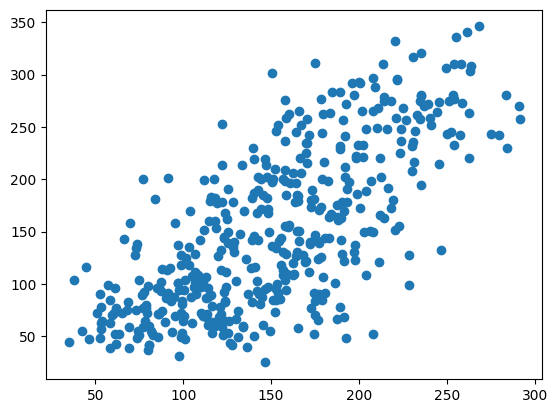

In [44]:
plt.scatter(model.predict(X), y)

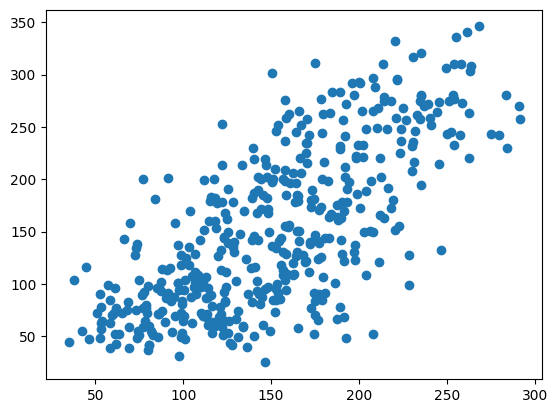

In [51]:
plt.scatter(pipe.predict(X),y)

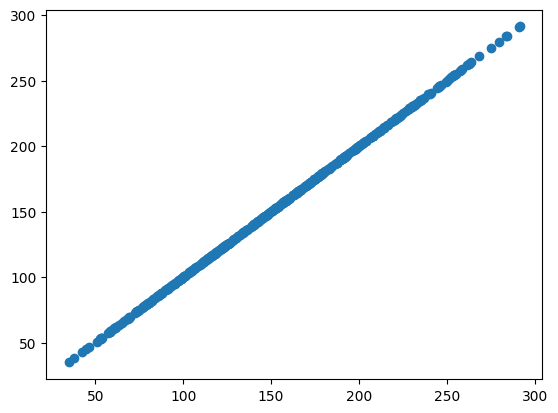

In [41]:
plt.scatter(pipe.predict(X),model.predict(X))

In [425]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import time
# Sample dates and stock names
dates = pd.date_range("2023-01-01", periods=50, freq="D")
stocks = ["AAPL", "GOOG", "MSFT"]

# Create a MultiIndex from product of dates and stock names
index = pd.MultiIndex.from_product([dates, stocks], names=["date", "stock"])
np.random.seed(42)  # For reproducibility

# Generate some sample data
data = {
    "price": np.random.normal(0, 1, len(index)),
    "volume": np.random.uniform(-0.25, 0.25, len(index)),
}
data['return'] = data['price'] + np.random.uniform(-0.01, 0.01)
# Create the DataFrame
finance_df = pd.DataFrame(data, index=index)
print(finance_df)

# Display the DataFrame
def sharpe_loss(params, X, y, dates, alpha=0.001):
    weights = params[:-1]
    intercept = params[-1]
    # Compute predictions using linear regression

    predictions = X @ weights + intercept
    return np.sum(np.square(predictions - y)) + alpha * np.sum(np.square(params)) 

    # Convert predictions into a Series with the same index as dates
    pred_series = pd.Series(predictions, index=dates)
    # Normalize predictions within each day to use as weights
    norm_pred = pred_series.groupby(level=0).transform(lambda x: x / x.abs().sum())
    # Compute weighted (actual) returns and aggregate them by day
    weighted_returns = norm_pred * y
    daily_returns = pd.Series(weighted_returns, index=dates).groupby(level=0).sum()
    # Calculate Sharpe ratio: mean over std of daily returns
    sharpe_ratio = daily_returns.mean() / daily_returns.std()
    # time.sleep(1000)
    print("Sharpe ratio:", sharpe_ratio)
    return -sharpe_ratio + alpha * np.sum(np.square(params))  # Negative Sharpe ratio with regularization term

# Prepare input data from finance_df
X = finance_df[['price', 'volume']].values
# print(X)
y = finance_df['return'].values
dates = finance_df.index.get_level_values('date')
# print(dates)


# Initialize parameters: one weight per feature plus an intercept
np.random.seed()  # For reproducibility
initial_params = np.random.normal(0, 1, X.shape[1] + 1)
# initial_params = [1, 0, 0]
bounds = [(0.9, 1.1), (0, 0.0), (0, 0)]

# Optimize the parameters to maximize the Sharpe ratio (minimize negative Sharpe ratio)
result = minimize(sharpe_loss, initial_params, args=(X, y, dates), method='L-BFGS-B', bounds=bounds)

# Extract the optimized weights and intercept
optimized_weights = result.x[:-1]
optimized_intercept = result.x[-1]

print("Optimized weights:", optimized_weights)
print("Optimized intercept:", optimized_intercept)


                     price    volume    return
date       stock                              
2023-01-01 AAPL   0.496714  0.193543  0.494206
           GOOG  -0.138264  0.139938 -0.140772
           MSFT   0.647689  0.071016  0.645181
2023-01-02 AAPL   1.523030 -0.207930  1.520522
           GOOG  -0.234153 -0.169186 -0.236661
...                    ...       ...       ...
2023-02-18 GOOG   0.781823 -0.033074  0.779315
           MSFT  -1.236951 -0.050748 -1.239458
2023-02-19 AAPL  -1.320457  0.057925 -1.322964
           GOOG   0.521942  0.067547  0.519434
           MSFT   0.296985 -0.227348  0.294477

[150 rows x 3 columns]
Optimized weights: [1.00022477 0.        ]
Optimized intercept: 0.0


In [36]:
a = pd.Series([1,2,3,4,-1,-2,-4])
c = a * 2
b = a.transform(lambda x: (x - x.mean()) / (x - x.mean()).abs().sum())
d = c.transform(lambda x: (x - x.mean()) / (x - x.mean()).abs().sum())
print(a, b, c, d)

0    1
1    2
2    3
3    4
4   -1
5   -2
6   -4
dtype: int64 0    0.034483
1    0.094828
2    0.155172
3    0.215517
4   -0.086207
5   -0.146552
6   -0.267241
dtype: float64 0    2
1    4
2    6
3    8
4   -2
5   -4
6   -8
dtype: int64 0    0.034483
1    0.094828
2    0.155172
3    0.215517
4   -0.086207
5   -0.146552
6   -0.267241
dtype: float64


In [ ]:
import numpy as np

# Define a 2x3 matrix
A = np.array([[1, 2, 3],
              [4, 5, 6]])

# Define a vector of length 3
v = np.array([1, 1, 0])

# Perform matrix-vector multiplication using "@"
result = A @ v

print("Result:", )

Result: [3 9]
